In [42]:
import pandas as pd
import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# import numpy as np
from prophet import Prophet

In [43]:
Data = pd.read_csv('stores_sales_forecasting.csv',encoding='ISO-8859-1')
Data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [44]:
# Rename the Columns name for easier access
Data.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)
Data['ds'] = pd.to_datetime(Data['ds'])

In [45]:
Data.info()
Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   ds             2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   object        
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

,Row ID,ds,Postal Code,y,Quantity,Discount,Profit
count,2121.000000,2121,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,2016-04-30 03:54:13.748231680,55726.556341,349.834887,3.785007,0.173923,8.699327
min,1.000000,2014-01-06 00:00:00,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,2015-05-26 00:00:00,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,2016-06-20 00:00:00,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,2017-05-14 00:00:00,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,2017-12-30 00:00:00,99301.000000,4416.174000,14.000000,0.700000,1013.127000
std,2885.740258,NaN,32261.888225,503.179145,2.251620,0.181547,136.049246


In [46]:
# Sorting the Data by Date
Data = Data.sort_values(by='ds')

In [47]:
# Train-Test Split (Taking the Last 30 Days for Testing Purposes)
train = Data[:-30]
test = Data[-30:]

In [50]:
# Initializing the Prophet Model
Sales_Model = Prophet(daily_seasonality=True, yearly_seasonality=True)
Sales_Model.add_country_holidays(country_name='US')
Sales_Model.fit(train)

19:04:11 - cmdstanpy - INFO - Chain [1] start processing
19:04:11 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Making Predictions
future = Sales_Model.make_future_dataframe(periods=30)
forecast = Sales_Model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

            ds        yhat  yhat_lower   yhat_upper
883 2017-12-23  296.752682 -312.020510   937.805616
884 2017-12-24  307.900942 -301.374796   941.386723
885 2017-12-25  643.830332  -18.856125  1282.784902
886 2017-12-26  316.299211 -327.061851   961.255222
887 2017-12-27  384.305330 -281.936211   992.421411
888 2017-12-28  358.563660 -275.080018  1004.366462
889 2017-12-29  347.650769 -260.635292   978.447227
890 2017-12-30  321.098295 -309.152390   952.690761
891 2017-12-31  335.671810 -269.016800   968.401757
892 2018-01-01  270.871061 -380.877456   925.793822
893 2018-01-02  348.330165 -378.710061  1014.364911
894 2018-01-03  416.987579 -237.204176  1030.344427
895 2018-01-04  390.836037 -269.041045  1031.119010
896 2018-01-05  378.433719 -267.587363  1049.966285
897 2018-01-06  349.325382 -295.249126   990.551638
898 2018-01-07  360.320981 -285.812991  1013.404357
899 2018-01-08  411.662718 -252.372271  1059.822945
900 2018-01-09  363.083273 -299.644343  1039.745257
901 2018-01-

In [41]:
# To Check the holidays and Forcast 
print(forecast)

            ds        trend  yhat_lower   yhat_upper  trend_lower  \
0   2014-01-06  2136.363918 -124.811585  1137.983065  2136.363918   
1   2014-01-07  2136.302411 -201.743101  1106.220745  2136.302411   
2   2014-01-10  2136.117889 -175.156762  1133.336634  2136.117889   
3   2014-01-11  2136.056382 -165.730024  1064.070182  2136.056382   
4   2014-01-13  2135.933367 -187.331151  1161.740195  2135.933367   
..         ...          ...         ...          ...          ...   
908 2018-01-17  2045.858922 -257.055625  1062.042260  2045.858912   
909 2018-01-18  2045.797465 -243.622290   950.694580  2045.797453   
910 2018-01-19  2045.736007 -287.249049  1007.918330  2045.735993   
911 2018-01-20  2045.674550 -365.067983   950.467963  2045.674533   
912 2018-01-21  2045.613092 -376.013150   935.334958  2045.613074   

     trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
0    2136.363918            0.0                  0.0                  0.0   
1    2136.302411 

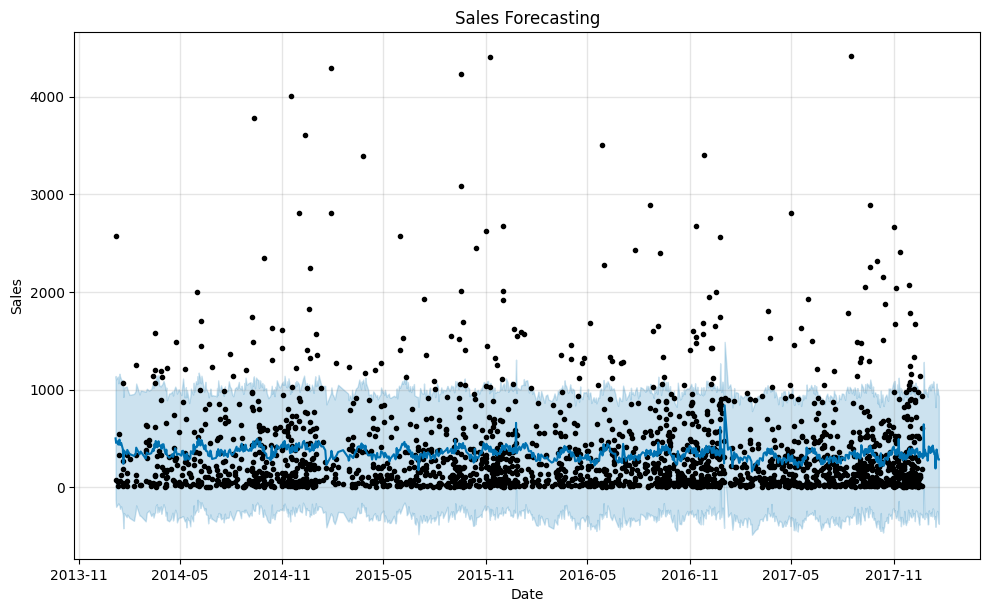

In [40]:
# Plotting the Forecast
Sales_Model.plot(forecast)
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [20]:
# Evaluate RMSE on Test Set
y_true = test['y'].values
y_pred = forecast['yhat'].tail(30).values
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'Test RMSE: {rmse:.2f}')

Test RMSE: 1567.55
